In [1]:
%matplotlib inline

In [2]:
# initialization

from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

Open file returns an OpticalModel instance. Recognizes CODE V .seq or ray-optics .roa JSON files

In [5]:
app.model = open_model(root_pth/"codev/tests/ag_dblgauss.seq")
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

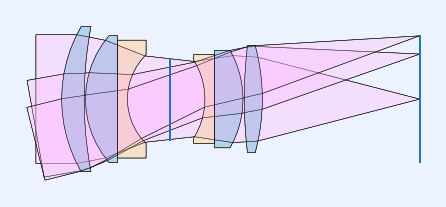

In [6]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()

In [7]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  9.93938e+11       air   transmit  1  2.4782e+11
   1:     0.017793      8.75000    N-SSK2   transmit  1      28.172
   2:     0.006567     0.500000       air   transmit  1      27.136
   3:     0.026537      12.5000     N-SK2   transmit  1      24.626
   4:     0.000000      3.80000        F5   transmit  1      22.894
   5:     0.041269      16.3694       air   transmit  1      17.293
Stop:     0.000000      13.7480       air   transmit  1      15.758
   7:    -0.035239      3.80000        F5   transmit  1      15.135
   8:     0.000000      11.0000    N-SK16   transmit  1      17.250
   9:    -0.026368     0.500000       air   transmit  1      18.926
  10:     0.005637      7.00000    N-SK16   transmit  1      20.349
  11:    -0.012593      61.0873       air   transmit  1      20.776
 Img:     0.000000      0.00000             transmit  1      24.592


In [8]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same)

<RayFanFigure size 432x288 with 0 Axes>

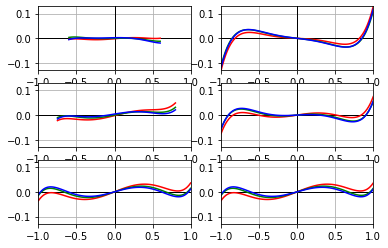

In [9]:
abr_plt.plot()

In [10]:
yybar_plt = plt.figure(FigureClass=ParaxialDesignFigure, opt_model=opm, dgm_type='ht', refresh_gui=None)

<ParaxialDesignFigure size 432x288 with 0 Axes>

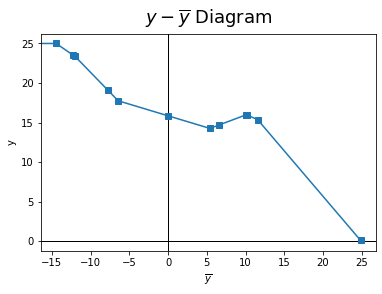

In [11]:
yybar_plt.plot()

In [12]:
sm.gaps[-1].thi=61

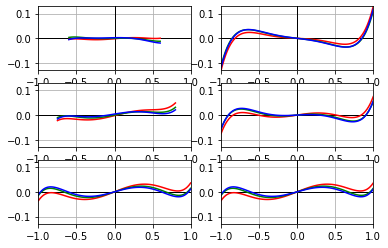

In [13]:
abr_plt.plot()

In [14]:
opm.update_model()

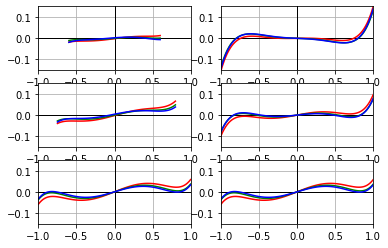

In [15]:
abr_plt.update_data()
abr_plt.plot()

In [16]:
fo.list_parax_trace(opm)

stop surface: 6
           y           u           n*i         ybar         ubar        n*ibar
 0            0  2.51525e-11  2.51525e-11 -2.47817e+11     0.249328     0.249328
 1           25    -0.170628     0.444821     -14.4391     0.252237  -0.00758437
 2       23.507    -0.180751   -0.0263896      -12.232     0.359218     0.278896
 3      23.4166    -0.347265     0.440667     -12.0524     0.344338    0.0393784
 4      19.0758    -0.348123    -0.558186     -7.74817     0.345189     0.553482
 5      17.7529    -0.116096     0.616549     -6.43645     0.393199     0.127574
 6      15.8525    -0.116096    -0.116096 -1.74801e-06     0.393199     0.393199
 7      14.2564      0.11666    -0.618485      5.40568     0.316914     0.202706
 8      14.6998     0.115437     0.187054      6.60996     0.313591     0.508146
 9      15.9696   -0.0741853    -0.495263      10.0595     0.343587    0.0783442
10      15.9325   -0.0801657    0.0156197      10.2313     0.189957     0.401257
11      15.371

In [17]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.01779284094091543), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.006566600536925569), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.02653743294670983), interact_mode=transmit)
4 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.04126892878570084), interact_mode=transmit)
6 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
7 Surface(profile=Spherical(c=-0.03523942654429074), interact_mode=transmit)
8 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
9 Surface(profile=Spherical(c=-0.02636750828657709), interact_mode=transmit)
10 Surface(profile=Spherical(c=0.005636604951748545), interact_mode=transmit)
11 Surface(profile=Spherical(c=-0.0125926458590576), interact_mode=transmit)
12 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [18]:
sm.list_gaps()

0 Gap(t=993938392063.0, medium=Air)
1 Gap(t=8.75, medium=SchottGlass('N-SSK2'))
2 Gap(t=0.5, medium=Air)
3 Gap(t=12.5, medium=SchottGlass('N-SK2'))
4 Gap(t=3.8, medium=SchottGlass('F5'))
5 Gap(t=16.36944492653564, medium=Air)
6 Gap(t=13.74795696388906, medium=Air)
7 Gap(t=3.8, medium=SchottGlass('F5'))
8 Gap(t=11.0, medium=SchottGlass('N-SK16'))
9 Gap(t=0.5, medium=Air)
10 Gap(t=7.0, medium=SchottGlass('N-SK16'))
11 Gap(t=61, medium=Air)


In [19]:
pm.list_lens()
print("\n")
osp.parax_data.fod.list_first_order_data()

       ax_ray_ht    ax_ray_slp
 0:            0   2.51525e-11
 1:           25     -0.276808
 2:       23.507     -0.180751
 3:       23.417     -0.558186
 4:       19.076     -0.558186
 5:       17.753     -0.116096
 6:       15.853     -0.116096
 7:       14.256      0.187054
 8:         14.7      0.187054
 9:        15.97    -0.0741853
10:       15.932     -0.129901
11:       15.371     -0.249991
12:      0.12188     -0.249991

       pr_ray_ht    pr_ray_slp
 0:  -2.4782e+11      0.249328
 1:      -14.439      0.409202
 2:      -12.232      0.359218
 3:      -12.052      0.553482
 4:      -7.7482      0.553482
 5:      -6.4365      0.393199
 6:   -1.748e-06      0.393199
 7:       5.4057      0.508146
 8:         6.61      0.508146
 9:       10.059      0.343587
10:       10.231      0.307809
11:       11.561      0.217488
12:       24.828      0.217488

            power           tau        index    type
 0:             0    9.9394e+11      1.00000    transmit
 1:    0.01107233   

In [20]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

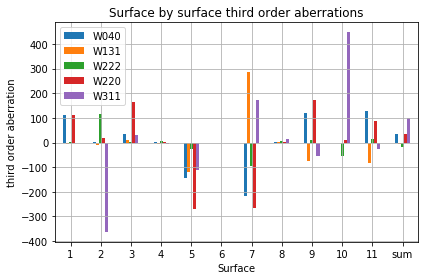

In [21]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

In [22]:
pm.list_lens()
print("\n")
osp.parax_data.fod.list_first_order_data()

       ax_ray_ht    ax_ray_slp
 0:            0   2.51525e-11
 1:           25     -0.276808
 2:       23.507     -0.180751
 3:       23.417     -0.558186
 4:       19.076     -0.558186
 5:       17.753     -0.116096
 6:       15.853     -0.116096
 7:       14.256      0.187054
 8:         14.7      0.187054
 9:        15.97    -0.0741853
10:       15.932     -0.129901
11:       15.371     -0.249991
12:      0.12188     -0.249991

       pr_ray_ht    pr_ray_slp
 0:  -2.4782e+11      0.249328
 1:      -14.439      0.409202
 2:      -12.232      0.359218
 3:      -12.052      0.553482
 4:      -7.7482      0.553482
 5:      -6.4365      0.393199
 6:   -1.748e-06      0.393199
 7:       5.4057      0.508146
 8:         6.61      0.508146
 9:       10.059      0.343587
10:       10.231      0.307809
11:       11.561      0.217488
12:       24.828      0.217488

            power           tau        index    type
 0:             0    9.9394e+11      1.00000    transmit
 1:    0.01107233   

In [23]:
fo.list_parax_trace(opm)

stop surface: 6
           y           u           n*i         ybar         ubar        n*ibar
 0            0  2.51525e-11  2.51525e-11 -2.47817e+11     0.249328     0.249328
 1           25    -0.170628     0.444821     -14.4391     0.252237  -0.00758437
 2       23.507    -0.180751   -0.0263896      -12.232     0.359218     0.278896
 3      23.4166    -0.347265     0.440667     -12.0524     0.344338    0.0393784
 4      19.0758    -0.348123    -0.558186     -7.74817     0.345189     0.553482
 5      17.7529    -0.116096     0.616549     -6.43645     0.393199     0.127574
 6      15.8525    -0.116096    -0.116096 -1.74801e-06     0.393199     0.393199
 7      14.2564      0.11666    -0.618485      5.40568     0.316914     0.202706
 8      14.6998     0.115437     0.187054      6.60996     0.313591     0.508146
 9      15.9696   -0.0741853    -0.495263      10.0595     0.343587    0.0783442
10      15.9325   -0.0801657    0.0156197      10.2313     0.189957     0.401257
11      15.371

In [24]:
ax=osp.parax_data.ax_ray
pr=osp.parax_data.pr_ray
fod=osp.parax_data.fod

In [25]:
fod.efl

100.00375702792972

In [26]:
ax[1][0]

24.99999999854337